#### Importa bibliotecas

In [1]:
import os
import urllib.request
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

### 1 - Classificação Binária

#### Configurando o ambiente

In [ ]:
os.mkdir('./dados')
os.mkdir('./imagens')

In [101]:
pst_dados = os.path.abspath(os.path.relpath('./dados'))
caminho_arquivo = os.path.join(pst_dados, 'two_moons.csv')
pst_imagens = os.path.abspath(os.path.relpath('./imagens'))

url_download_dados = 'http://www.dca.fee.unicamp.br/~lboccato/two_moons.csv'
urllib.request.urlretrieve(url_download_dados, caminho_arquivo)

('/home/jimi/Unicamp/ia006/list2/algoritimos/dados/two_moons.csv',
 <http.client.HTTPMessage at 0x7fde47f68f60>)

In [102]:
%%bash
head './dados/two_moons.csv'

,x_1,x_2,y
0,2.0644296514467197,0.546069086070731,1.0
1,1.762473261484448,-0.06268920285178106,1.0
2,-0.24548972654900278,1.068868024796405,0.0
3,-0.17463045222800389,0.18388168037297553,1.0
4,0.4521100769674068,-0.40651213749666293,1.0
5,1.9396117132053508,0.43090598314745787,1.0
6,0.898613370647941,0.8226576504874641,0.0
7,0.052218958530233006,1.3636857785600163,0.0
8,-0.6284662881051902,1.1413048711192604,0.0


#### Importa dados

In [103]:
dados = np.loadtxt(caminho_arquivo, skiprows=1, usecols=(1,2,3), delimiter=',')

In [104]:
dados

array([[ 2.06442965,  0.54606909,  1.        ],
       [ 1.76247326, -0.0626892 ,  1.        ],
       [-0.24548973,  1.06886802,  0.        ],
       ...,
       [ 0.35132285, -0.53361311,  1.        ],
       [ 0.15631506,  0.08097761,  1.        ],
       [ 0.51401549, -0.50367604,  1.        ]])

In [109]:
x_1_2 = dados[:,0:2]
y = dados[:,2].astype(int)
y = y.reshape((y.shape[0], 1))
dados.shape, x_1_2.shape, x_1_2.shape

((1000, 3), (1000, 2), (1000, 2))

In [106]:
dados

array([[ 2.06442965,  0.54606909,  1.        ],
       [ 1.76247326, -0.0626892 ,  1.        ],
       [-0.24548973,  1.06886802,  0.        ],
       ...,
       [ 0.35132285, -0.53361311,  1.        ],
       [ 0.15631506,  0.08097761,  1.        ],
       [ 0.51401549, -0.50367604,  1.        ]])

In [113]:
x_1_2

array([[ 2.06442965,  0.54606909],
       [ 1.76247326, -0.0626892 ],
       [-0.24548973,  1.06886802],
       ...,
       [ 0.35132285, -0.53361311],
       [ 0.15631506,  0.08097761],
       [ 0.51401549, -0.50367604]])

In [114]:
y

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [6]:
Phi = np.column_stack((np.ones(x_1_2.shape[0]), x_1_2))
Phi.shape

(1000, 3)

In [7]:
mask1 = [i for i, e in enumerate(y) if e]
mask0 = [i for i, e in enumerate(y) if not e]

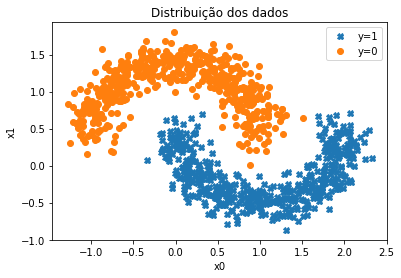

In [8]:
plt.plot(x_1_2[mask1,0], x_1_2[mask1,1], 'X')
plt.plot(x_1_2[mask0,0], x_1_2[mask0,1], 'o')
plt.xlabel('x0'), plt.ylabel('x1')
plt.title("Distribuição dos dados")
plt.legend(['y=1', 'y=0'])
plt.savefig(os.path.join(pst_imagens, 'data.png'), bbox_inches='tight')
plt.show()

Os modelos lineares não são capazes de separar o modelo

#### Discriminante linear de Fischer

In [9]:
y_hat = lambda w, X: np.dot(X, w)

In [10]:
Sw = np.zeros((2,2))
mu1 = np.mean(X[mask1], 0)
mu0 = np.mean(X[mask0], 0)

for i in mask0:
    Sw += np.dot((X[i].reshape((2,1)) - mu0.reshape((1,2))),((X[i].reshape((2,1)) - mu0.reshape((1,2)))).T)
for i in mask1:
    Sw += np.dot((X[i].reshape((2,1)) - mu1.reshape((1,2))),((X[i].reshape((2,1)) - mu1.reshape((1,2)))).T)
Sw

array([[ 2.23939149e+03, -5.36498142e-02],
       [-5.36498142e-02,  1.43394973e+03]])

In [11]:
Sb = np.dot((mu1 - mu0),(mu1 - mu0).T)
Sb

2.4003468221575144

In [12]:
J = lambda w: np.dot(np.dot(w.T, Sb), w)/np.dot(np.dot(w.T, Sw), w)

In [13]:
w = np.dot(np.linalg.inv(Sw),(mu1 - mu0))
w = w/np.linalg.norm(w)
w

array([ 0.48042956, -0.87703332])

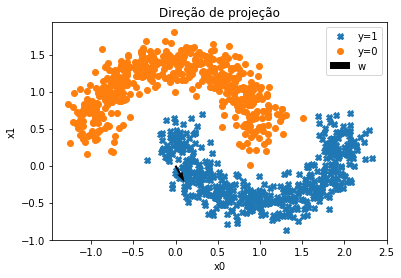

In [14]:
plt.plot(X[mask1, 0], X[mask1,1], 'X', zorder=1)
plt.plot(X[mask0, 0], X[mask0, 1], 'o', zorder=2)


origin = [0], [0] # origin point
plt.xlabel('x0'), plt.ylabel('x1')
plt.title("Direção de projeção")
plt.quiver(*origin, w[0], w[1], width=0.006, color='black', zorder=3)

plt.legend(['y=1', 'y=0', 'w'])
plt.savefig(os.path.join(pst_imagens, 'proj.png'), bbox_inches='tight')
plt.show()

#### Projeção em w

In [15]:
mu = np.array([np.average(X[:,0]), np.average(X[:,1])])
delta = np.array([(np.max(X[:,0]) - np.min(X[:,0])), (np.max(X[:,1]) - np.min(X[:,1]))])

X = (X - np.ones([X.shape[0],1])*mu)*(np.ones([X.shape[0],1])*(1/delta))

In [16]:
lda = lambda X, w: np.dot(X, w)

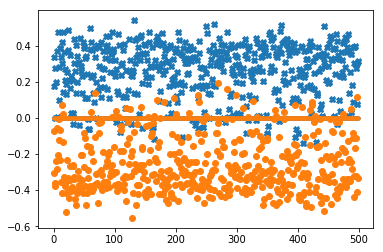

In [17]:
out = lda(X, w)
plt.stem(out[mask1], basefmt='.', linefmt='C0.', markerfmt='C0X')
plt.stem(out[mask0], basefmt='.', linefmt='C1.', markerfmt='C1o')
plt.savefig(os.path.join(pst_imagens, 'stem_proj.png'), bbox_inches='tight')
plt.show()

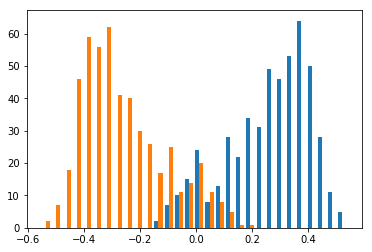

In [18]:
plt.hist([out[mask1], out[mask0]], bins=30, color=['C0', 'C1'])
plt.savefig(os.path.join(pst_imagens, 'hist.png'), bbox_inches='tight')
plt.show()

Como previsto, os dados não podem ser totalmente separados. Na direção projetada, há uma mistura dos dados entre os valores -0.2, 0.2

#### Curva ROC

In [19]:
def decision(X, w, thres, model):
    out = model(X, w)
    return np.array([1 if e > thres else 0 for e in out])

In [20]:
def confusion(out, y):
    tp = fp = tn = fn = 0
    for i, e in enumerate(out):
        if e:
            if y[i]:
                tp += 1
            else:
                fp += 1
        else:
            if y[i]:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

In [21]:
def roc_curve(X, y, w, thres_v, model):
    roc = []
    f1_v = []
    for t in thres_v:
        out = decision(X, w, t, model)
        tp, fp, fn, tn = confusion(out, y)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        f1 = 2*tp/(2*tp + fn + fp)
        f1_v.append([t, f1])
        roc.append([fpr, tpr])
    return np.array(roc), np.array(f1_v)

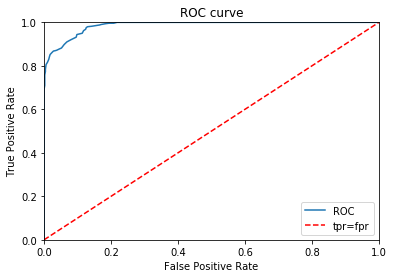

In [22]:
thres_v = [0.01*e for e in range(-200, 201)]
roc, f1 = roc_curve(X, y, w, thres_v, lda)
plt.plot(roc[:,0], roc[:,1], 'C0-')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve")
plt.legend(["ROC", "tpr=fpr"])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(pst_imagens, 'roc.png'), bbox_inches='tight')
plt.show()

#### F1 

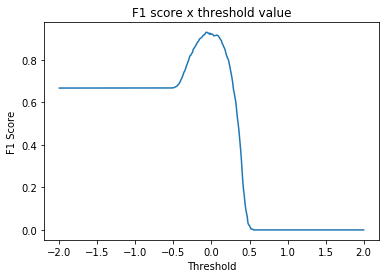

Threshold with highest f1-score:  -0.07


In [23]:
plt.plot(f1[:,0], f1[:,1], 'C0-')
plt.title("F1 score x threshold value")
plt.ylabel('F1 Score')
plt.xlabel('Threshold')
plt.savefig(os.path.join(pst_imagens, 'f1.png'), bbox_inches='tight')
plt.show()
print("Threshold with highest f1-score: ", f1[np.argmax(f1[:,1]), 0])

#### Regressão Logística

In [24]:
g = lambda z: 1/(1 + np.exp(-z))

In [25]:
lr = lambda Phi, w: g(np.dot(Phi, w))

In [26]:
mmq = lambda Phi, y: np.dot(np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T), y)

In [27]:
w = mmq(Phi, y)

In [28]:
def J(y_hat, y):
    J = 0
    for e, f in zip(y, y_hat):
        J += e*np.log10(f) + (1-e)*np.log10(1-f)
    return (-J/y.shape[0])[0]

In [29]:
def gradient_descent_step(Phi, y_hat, y, w, alpha):
    grad = -np.dot((y - y_hat).T, Phi)/y_hat.shape[0]
    grad = np.sum(grad, 0)/y_hat.shape[0]
    grad = grad.reshape((grad.shape[0], 1))
    return w - alpha*grad

In [30]:
def gradient_descent(Phi, y, w, alpha, epochs, early_stop_param, v=0):
    epoch = count = 0
    min_error = 999
    while epoch < epochs and count < early_stop_param:
        y_hat = lr(Phi, w)
        error = J(y_hat, y)
        w = gradient_descent_step(Phi, y_hat, y, w, alpha)
        if error < min_error:
            min_error = error
            count = 0
        else:
            count += 1
        if v:
            print('.', end='')
        epoch += 1
    
    return w

In [31]:
w = 0.1*np.random.random([3])
w = w.reshape((w.shape[0], 1))

In [32]:
w = gradient_descent(Phi, y, w, 5, 5000, 10, 1)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [33]:
w

array([[ 0.37874742],
       [ 1.18196553],
       [-2.55468518]])

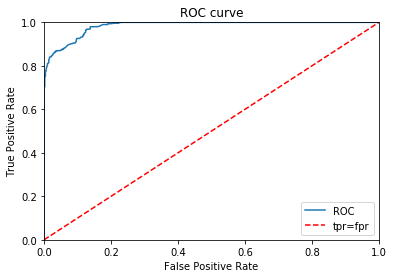

In [35]:
thres_v = [0.001*e for e in range(0,1001, 5)]
roc, f1 = roc_curve(Phi, y, w, thres_v, lr)
plt.plot(roc[:,0], roc[:,1], 'C0-')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve")
plt.legend(["ROC", "tpr=fpr"])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(pst_imagens, 'roc_lr.png'), bbox_inches='tight')
plt.show()

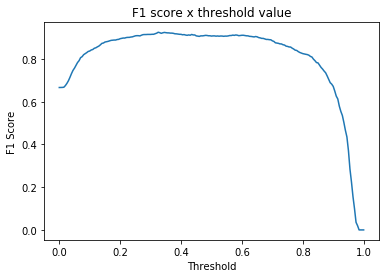

Threshold with highest f1-score:  0.325


In [36]:
plt.plot(f1[:,0], f1[:,1], 'C0-')
plt.title("F1 score x threshold value")
plt.ylabel('F1 Score')
plt.xlabel('Threshold')
plt.savefig(os.path.join(pst_imagens, 'f1_lr.png'), bbox_inches='tight')
plt.show()
print("Threshold with highest f1-score: ", f1[np.argmax(f1[:,1]), 0])

# 2 - Classificação multi-classe

#### Download dados

In [37]:
url_download_dados = 'http://www.dca.fee.unicamp.br/~lboccato/dataset_vehicle.csv'
caminho_arquivo = os.path.join(pst_dados, 'dataset_vehicle.csv') 
 
urllib.request.urlretrieve(url_download_dados, caminho_arquivo)

('/home/jimi/Unicamp/ia006/list2/algoritimos/dados/dataset_vehicle.csv',
 <http.client.HTTPMessage at 0x7fde30a6c7b8>)

In [38]:
%%bash
head "./dados/dataset_vehicle.csv"

"COMPACTNESS","CIRCULARITY","DISTANCE_CIRCULARITY","RADIUS_RATIO","PR.AXIS_ASPECT_RATIO","MAX.LENGTH_ASPECT_RATIO","SCATTER_RATIO","ELONGATEDNESS","PR.AXIS_RECTANGULARITY","MAX.LENGTH_RECTANGULARITY","SCALED_VARIANCE_MAJOR","SCALED_VARIANCE_MINOR","SCALED_RADIUS_OF_GYRATION","SKEWNESS_ABOUT_MAJOR","SKEWNESS_ABOUT_MINOR","KURTOSIS_ABOUT_MAJOR","KURTOSIS_ABOUT_MINOR","HOLLOWS_RATIO","Class"
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van


#### Importa dados

In [39]:
X = np.loadtxt(caminho_arquivo, skiprows=1, usecols=range(18), delimiter=',')
X.shape

(846, 18)

In [40]:
y = []
with open(caminho_arquivo) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        y.append(row['Class'])   
len(y)

846

In [41]:
classes = list(set(y))
classes

['saab', 'opel', 'bus', 'van']

In [42]:
Y = np.zeros((len(y), len(classes)))
for i, e in enumerate(y):
    if e == classes[0]:
        Y[i,0] = 1
    elif e == classes[1]:
        Y[i,1] = 1
    elif e == classes[2]:
        Y[i,2] = 1
    else:
        Y[i,3] = 1
Y.shape

(846, 4)

In [43]:
holdout_n = int(0.3*len(y))

In [44]:
mu = np.array([np.average(X[:,i]) for i in range(X.shape[1])])
delta = np.array([(np.max(X[:,i]) - np.min(X[:,i])) for i in range(X.shape[1])])

X = (X - np.ones([X.shape[0],1])*mu)*(np.ones([X.shape[0],1])*(1/delta))

In [45]:
X_test = X[:holdout_n, :]
X_train = X[holdout_n:,:]
Y_test = Y[:holdout_n, :]
Y_train = Y[holdout_n:,:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((593, 18), (253, 18), (593, 4), (253, 4))

In [46]:
Phi_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
Phi_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

#### Regressão Logística

In [47]:
Q = len(classes)
W = 0.01*np.random.random(((Q*(Q-1))//2, Phi_test.shape[1]))
W.shape

(6, 19)

In [48]:
k = 0
mask = [[]]*W.shape[0]
aux = []
for i in range(Q-1):
    for j in range(i+1, Q):
        mask[k] = [l for l, (e, f) in enumerate(zip(Y_train[:,i],Y_train[:,j])) if (e or f)]
        k += 1
        aux.append((i, j))

In [49]:
for i, m in enumerate(mask):
    w = W[i].reshape((W.shape[1], 1))
    y = Y_train[m,aux[i][0]].reshape((Y_train[m].shape[0], 1))
    X = Phi_train[m,:]
    grad = gradient_descent(X, y, w, 1000, 5000, 5)[:,0]
    W[i] = grad[:]

In [50]:
def one_vs_one(Phi, W):
    votes = np.zeros((Phi.shape[0], 4))
    ans = []

    for i, a in enumerate(aux):
        w = W[i].reshape((W.shape[1], 1))
        X = Phi
        y = lr(X, w)
        for j, e in enumerate(y):
            votes[j, a[0]] += e
            votes[j, a[1]] += 1-e
    for e in votes:
        #print(e)
        ans.append(np.argmax(e))
    return ans

In [51]:
y_hat = one_vs_one(Phi_test, W)

In [52]:
Y_hat = np.zeros((len(y), len(classes)))
for i, e in enumerate(y):
    if e == classes[0]:
        Y_hat[i,0] = 1
    elif e == classes[1]:
        Y_hat[i,1] = 1
    elif e == classes[2]:
        Y_hat[i,2] = 1
    else:
        Y_hat[i,3] = 1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [53]:
y_test = np.argmax(Y_test, 1)
np.sum((y_test == np.array(y_hat)))/y_test.shape[0]

0.8023715415019763

In [54]:
def confusion(y_hat, y, n_classes):
    ans = np.zeros((n_classes, n_classes))
    for i, (e, f) in enumerate(zip(y, y_hat)):
        ans[int(e)][int(f)] += 1
    return ans

In [55]:
print(classes)
cm = confusion(y_hat, y_test, len(classes))

['saab', 'opel', 'bus', 'van']


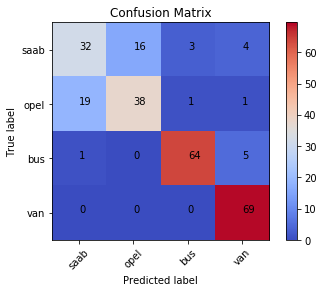

In [56]:
N = len(y)/4
cax = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm, vmin=0, vmax=N)
classNames = classes
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i, e in enumerate(cm):
    for j, f in enumerate(e):
        plt.text(j,i, str(int(cm[i][j])))
plt.colorbar(cax)
plt.show()

#### K-nearest Neighbours

In [57]:
d = lambda x, y, p: np.power(np.linalg.norm((x-y), p), 1./p)

In [58]:
def neighboors(x, X, k):
    dist = []
    for i, e in enumerate(X):
        dist.append(d(x, e, 2))
    dist = np.array(dist)
    ans = [[e, f] for e, f in zip(np.argsort(dist), np.sort(dist))]
    return ans[:k]

In [59]:
def knn(X_train, Y_train, x, k):
    X_prime = neighboors(x, X_train, k)
    mask = [n[0] for n in X_prime]
    classes = np.sum(Y_train[mask], 0)
    return np.argmax(classes)

In [60]:
def knn_predict(X_train, Y_train, X_test, k):
    y_test = np.empty(X_test.shape[0])
    for i, x in enumerate(X_test):
        y_test[i] =  knn(X_train, Y_train, x, k)
    return y_test

In [61]:
y_hat = knn_predict(X_train, Y_train, X_test, 10)

In [62]:
y_test = np.argmax(Y_test, 1)
np.sum((y_test == np.array(y_hat)))/y_test.shape[0]

0.6719367588932806

In [63]:
avg_acc = np.sum(cm, 0)

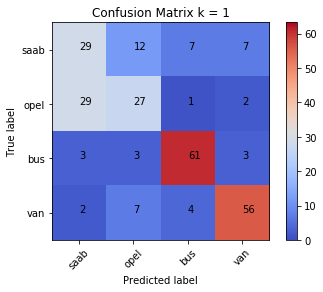

Average accuracy: 0.6838


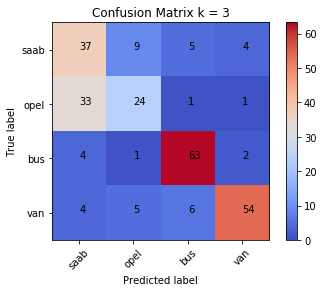

Average accuracy: 0.7036


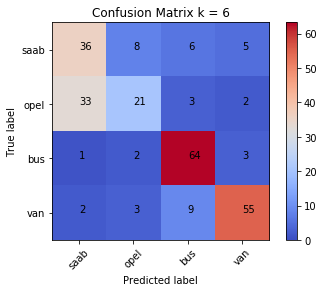

Average accuracy: 0.6957


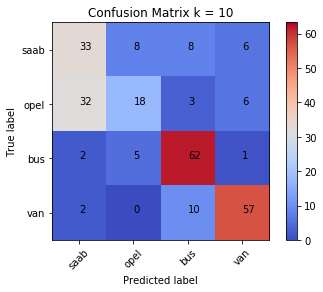

Average accuracy: 0.6719


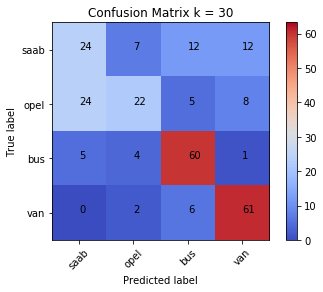

Average accuracy: 0.6601


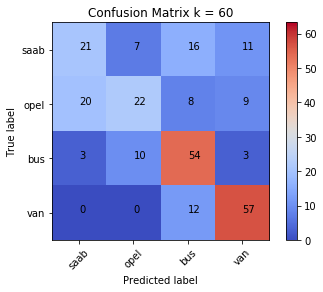

Average accuracy: 0.6087


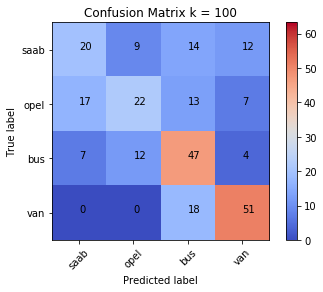

Average accuracy: 0.5534


In [64]:
for k in [1, 3, 6, 10, 30, 60, 100]:
    y_hat = knn_predict(X_train, Y_train, X_test, k)
    cm = confusion(y_hat, y_test, len(classes))
    N = len(y_test)/4
    cax = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm, vmin=0, vmax=N)
    classNames = classes
    plt.title('Confusion Matrix k = '+str(k))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i, e in enumerate(cm):
        for j, f in enumerate(e):
            plt.text(j,i, str(int(cm[i][j])))
    plt.colorbar(cax)
    plt.show()
    print("Average accuracy: {:.4f}".format(np.sum(np.diag(cm))/np.sum(cm)))

Houve pouca variação na acurácia com a variação do número k, porém o melhor modelo entre os testados foi com k = 6 (acurácia média = 0.6957). Modelos com k muito pequeno podem generalizar mal por mapear apenas o ponto mais perto ou poucos pontos mais pertos, porém, um k muito grande gera um modelo com uma capacidade muito baixa de estimar as classes, por considerar muitos vizinhos.

O mesmo efeito sobre as classes 'opel' e 'saab' pode ser observado.

Em comparação com o modelo de regressão logística (acurácia média = 0.8024), o modelo knn se comportou com um desempenho menor para todos os k's testados. Neste modelo não há um treino propriamente dito, e mesmo levando em conta o tempo que demora para estimar, usa muito menos processamento do que para treinar os parâmetros da regressão logística.